In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [35]:
path_dataset = 'AN-NAN-Hypotension-datasets/Prediction_Hypo_IRB_Data_set/'
file = 'patient-aggregate-features--format-IV--delta-bpcolumns.csv'
Patient = pd.read_csv(path_dataset+file)
Patient_copy = Patient.copy()
Patient_copy = Patient_copy.reindex(columns=['hmpcrtno', 'day_stamp', 'time_stamp', 'vpressure', 'apressure', 'tmp',
        'abf', 'ttemper', 'atemper', 'conductivity', 'ufrate', 'uftarget',
        'ufvolume', 'uftime', 'flowrate', 'currflowrate', 'bloodleakv',
        'cloudingv', 'cyclicpht', 'targetsodium', 'bicarbonatea', 'effectivebf',
        'accumulatbv', 'startsodium', 'ufprofile', 'sodiumpfile', 'hpdelrate',
        'watch', 'daidate', 'daitime', 'oCare_HR_mean', 'oCare_HR_cv', 'oCare_SpO2_mean', 'oCare_SpO2_cv', 
        'delta_systole', 'systole', 'delta_map', 'map', 'delta_diastolic', 'diastolic', 'delta_pulserate', 'pulserate', 
        'Hypo_delta_20', 'Hypo_90mmHg', ])
Patient_copy.shape
Patient_copy.head()

Patient_copy.groupby(['Hypo_delta_20']).size()
Patient_copy.groupby(['Hypo_90mmHg']).size()


(6812, 44)

,hmpcrtno,day_stamp,time_stamp,vpressure,apressure,tmp,abf,ttemper,atemper,conductivity,ufrate,uftarget,ufvolume,uftime,flowrate,currflowrate,bloodleakv,cloudingv,cyclicpht,targetsodium,bicarbonatea,effectivebf,accumulatbv,startsodium,ufprofile,sodiumpfile,hpdelrate,watch,daidate,daitime,oCare_HR_mean,oCare_HR_cv,oCare_SpO2_mean,oCare_SpO2_cv,delta_systole,systole,delta_map,map,delta_diastolic,diastolic,delta_pulserate,pulserate,Hypo_delta_20,Hypo_90mmHg
0,3376.0,3.0,3.0,167.4,-0.4,49.40,249.0,35.5,35.600,13.800,0.4,1.5,0.220,178.0,500.0,525.8,51.0,48.8,750.0,1380.0,0.0,248.40,78.60,0.0,0.0,0.0,10.0,5.0,1090824.0,80424.0,85.510638,0.014797,95.792553,0.035096,0.0,169.0,0.0,116.0,0.0,59.0,0.0,86.0,0.0,0.0
1,3376.0,3.0,4.0,170.4,0.0,48.00,248.4,35.5,35.640,13.760,0.4,1.5,0.300,167.8,500.0,524.2,51.0,48.8,750.0,1380.0,0.0,248.40,104.00,0.0,0.0,0.0,10.0,5.0,1090824.0,81424.0,84.570513,0.014007,97.523504,0.020945,0.0,169.0,0.0,116.0,0.0,59.0,0.0,86.0,0.0,0.0
2,3376.0,3.0,5.0,177.0,-1.0,47.25,249.0,35.5,35.675,13.775,0.4,1.5,0.375,158.0,500.0,515.0,51.0,49.0,750.0,1380.0,0.0,248.25,127.75,0.0,0.0,0.0,10.0,5.0,1090824.0,82624.0,84.195122,0.014675,95.889306,0.031271,0.0,147.0,0.0,106.0,0.0,61.0,0.0,85.0,1.0,0.0
3,3376.0,3.0,6.0,181.8,0.0,49.80,249.0,35.5,35.600,13.780,0.4,1.5,0.440,149.0,500.0,525.8,51.0,48.8,750.0,1380.0,0.0,248.40,151.00,0.0,0.0,0.0,10.0,5.0,1090824.0,83424.0,86.092077,0.023435,97.271949,0.027831,-22.0,147.0,-10.0,106.0,2.0,61.0,-1.0,85.0,1.0,0.0
4,3376.0,3.0,7.0,181.8,0.0,47.00,249.0,35.5,35.540,13.780,0.4,1.5,0.500,139.0,500.0,524.2,51.0,49.0,750.0,1380.0,0.0,248.60,175.80,0.0,0.0,0.0,10.0,5.0,1090824.0,84424.0,85.332536,0.013476,95.220096,0.042201,0.0,147.0,0.0,106.0,0.0,61.0,0.0,85.0,1.0,0.0


Hypo_delta_20
0.0    6011
1.0     801
dtype: int64

Hypo_90mmHg
0.0    6715
1.0      97
dtype: int64

In [47]:
# X, y = Patient_copy.iloc[:,np.r_[:34,36,38,40]],Patient_copy.iloc[:,-2]
# X, y = Patient_copy.iloc[:,np.r_[:34,37,39,41]],Patient_copy.iloc[:,-2]
# X, y = Patient_copy.iloc[:,np.r_[:34,36:42]],Patient_copy.iloc[:,-2]
# X, y = Patient_copy.iloc[:,np.r_[:35,36,38,40]],Patient_copy.iloc[:,-2]
# X, y = Patient_copy.iloc[:,np.r_[:34,35,37,39,41]],Patient_copy.iloc[:,-2]
X, y = Patient_copy.iloc[:,np.r_[:35,36:42]],Patient_copy.iloc[:,-1]
# X, y = Patient_copy.iloc[:,:35], Patient_copy.iloc[:,-2]

X.iloc[:, -10:].head()
data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=345)



,oCare_HR_cv,oCare_SpO2_mean,oCare_SpO2_cv,delta_systole,delta_map,map,delta_diastolic,diastolic,delta_pulserate,pulserate
0,0.014797,95.792553,0.035096,0.0,0.0,116.0,0.0,59.0,0.0,86.0
1,0.014007,97.523504,0.020945,0.0,0.0,116.0,0.0,59.0,0.0,86.0
2,0.014675,95.889306,0.031271,0.0,0.0,106.0,0.0,61.0,0.0,85.0
3,0.023435,97.271949,0.027831,-22.0,-10.0,106.0,2.0,61.0,-1.0,85.0
4,0.013476,95.220096,0.042201,0.0,0.0,106.0,0.0,61.0,0.0,85.0


In [48]:
clf = xgb.XGBClassifier(
        #GPU Mod
        #tree_method='gpu_hist', 
        #使用哪顆
        #gpu_id=7,
    
        #樹的個數
        n_estimators=100,
    
        # 如同學習率
        learning_rate= 0.3, 
    
        # 構建樹的深度，越大越容易過擬合    
        max_depth=6, 
    
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
    
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0.1, 
    
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
    
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000,
    
        # cpu 執行緒數 預設最大
        nthread=4,
    
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        scale_pos_weight=1
        
        # L1 正則項引數
       #reg_alpha=0,
        

        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
       #silent=0 ,
    
        #eval_metric= 'auc'
)

# 模型 訓練
clf.fit(X_train,y_train,eval_metric='auc')
# 預測值
y_pred=clf.predict(X_test)
# 真實值 賦值
y_true= y_test

cm = confusion_matrix(y_test, (y_pred>0.5))

# 計算精度

print("Prediction Target:", Patient_copy.iloc[:,-1].name)
print(confusion_matrix(y_true, y_pred))
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
print(classification_report(y_test,y_pred))





XGBClassifier(gamma=0.1, learning_rate=0.3, max_depth=6, nthread=4, seed=1000)

Prediction Target: Hypo_90mmHg
[[1339    2]
 [   8   14]]
Accuracy : 0.9927
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1341
         1.0       0.88      0.64      0.74        22

    accuracy                           0.99      1363
   macro avg       0.93      0.82      0.87      1363
weighted avg       0.99      0.99      0.99      1363



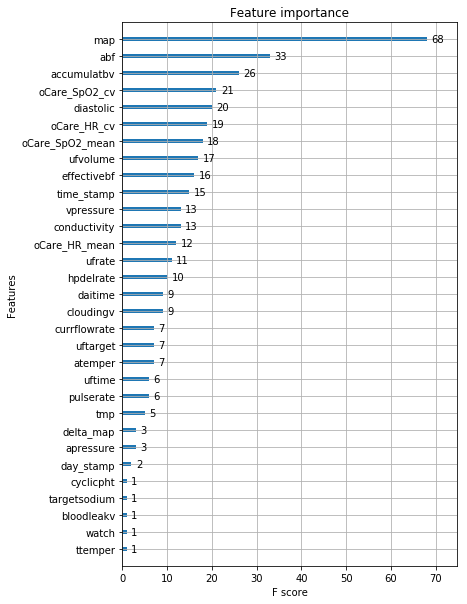

In [49]:
h = 10
w = 6
fig, ax = plt.subplots(figsize=(w, h))
xgb.plot_importance(clf, ax=ax).set_yticklabels(Patient_copy.columns);

# fig.savefig('/home/acusense2020/Nero_data/Features_importance.png', dpi=100)